# K-Nearest Neighbor algorithm

In this notebook I try make prediction using knn algorithm. Very simple algorithm to use. First of all, we import all needed libraries and take the dataset

In [62]:
import sklearn
from sklearn.utils import shuffle 
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing 
from sklearn.model_selection import train_test_split

data = pd.read_csv('car.data')

data.head()

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


After we encode all the data by numeric value

In [63]:
le = preprocessing.LabelEncoder()
buying = le.fit_transform(list(data['buying']))
persons = le.fit_transform(list(data['persons']))
doors = le.fit_transform(list(data['door']))
maint = le.fit_transform(list(data['maint']))
lug_boot = le.fit_transform(list(data['lug_boot']))
safety = le.fit_transform(list(data['safety']))
car_class = le.fit_transform(list(data['class']))

print(buying)

[3 3 3 ... 1 1 1]


Split the data to test and training

In [64]:
predict = "class"

X = list(zip(buying, maint, doors, persons, lug_boot, safety))
y = list(car_class)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

Fit the model and check accuracy

In [65]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print(acc)

0.861271676300578


Check with the actual value our prediction

In [67]:
predicted = model.predict(x_test)

names = ['unacc', 'acc', 'good', 'vgood']

for x in range(len(predicted)):
    print("Predicted:", names[predicted[x]],'Actual:', names[y_test[x]])

Predicted: unacc Actual: vgood
Predicted: unacc Actual: unacc
Predicted: good Actual: vgood
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: unacc Actual: unacc
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: unacc Actual: unacc
Predicted: good Actual: good
Predicted: unacc Actual: good
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: acc Actual: acc
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: good Actual: acc
Predicted: unacc Actual: unacc
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: unacc Actual: unacc
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: unacc Actual: acc
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: good Actual: good
Pre

## Confusion matrix 

In [79]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

y_pred = predicted
cm1 = metrics.confusion_matrix(y_test, y_pred)
cm1

array([[ 26,   0,   4,   1],
       [  7,   4,   2,   1],
       [  4,   0, 118,   0],
       [  2,   1,   2,   1]], dtype=int64)

Text(0.5, 257.44, 'Actual label')

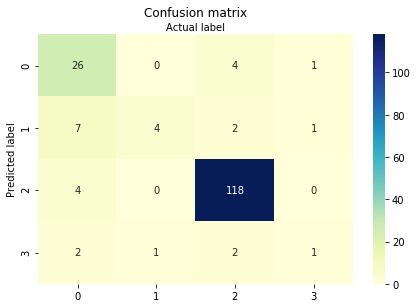

In [71]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(names))
plt.xticks(tick_marks, names)
plt.yticks(tick_marks, names)
# create heatmap
sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

## Visualize data
Take a count of each class to make some analysis

In [194]:
df = data['class'].value_counts()
df = {'class':names, 'count':list(df.values)}
df = pd.DataFrame(df)

,class,count
0,unacc,1210
1,acc,384
2,good,69
3,vgood,65


In [199]:
def get_pie(q, value, title):
    plt.pie(df[q],
        #Data labels are the team names in the dataFrame
       labels = df[value],
        #Give a tidier angle to ur first data angle
        startangle = 90
       )
    plt.title(title)
    plt.tight_layout()

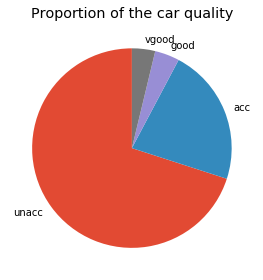

In [200]:
get_pie('count', 'class', "Proportion of the car quality")